In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load data
data = pd.read_csv('creditcard.csv')

# Preprocessing
sc = StandardScaler()
data['Amount'] = sc.fit_transform(data[['Amount']])
data = data.drop(['Time'], axis=1)

# Handle imbalance
X = data.drop('Class', axis=1)
y = data['Class']
X_res, y_res = SMOTE().fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate model
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9998944832316269
Precision: 0.9997894293535481
Recall: 1.0
F1 Score: 0.9998947035906076


In [3]:
# Save model
joblib.dump(rf, "credit_card_model.pkl")

# Load model
model = joblib.load("credit_card_model.pkl")

In [36]:
example_features = [-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.2892540,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229]  # Replace with real values
pred = model.predict([example_features])
print("Prediction:", "Fraudulent Transaction" if pred == 1  else "Normal Transaction")

Prediction: Fraudulent Transaction


C:\Users\SHAURYA TIWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
import numpy as np
unique, counts = np.unique(y_pred, return_counts=True)
print("Prediction distribution:")
for u, c in zip(unique, counts):
    print(f"Class {u}: {c} occurrences")

Prediction distribution:
Class 0: 56738 occurrences
Class 1: 56988 occurrences


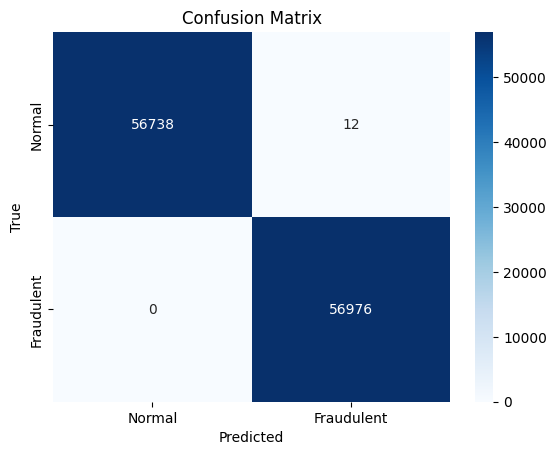

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Fraudulent'], 
            yticklabels=['Normal', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

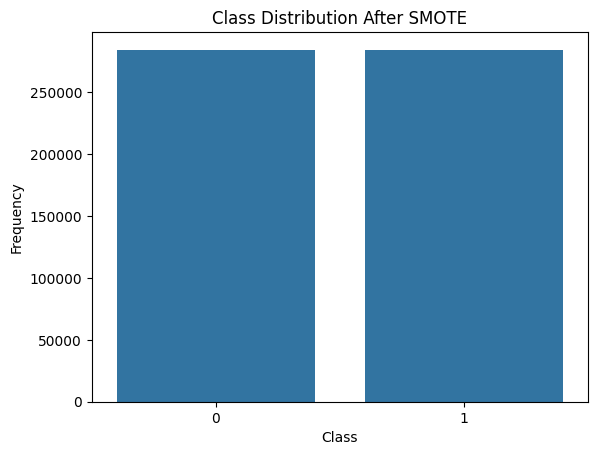

In [27]:
import seaborn as sns
sns.countplot(x=y_res)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [32]:
# Filter fraud transactions (Class == 1)
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 
fraud_transactions = data[data['Class'] == 1]

# Display some details about the fraud transactions
print(fraud_transactions.head())  # Display first few rows of fraud transactions
print(f"Number of fraud transactions: {fraud_transactions.shape[0]}")

            V1        V2        V3        V4        V5        V6        V7  \
541  -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
623  -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
4920 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
6108 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
6329  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   

            V8        V9       V10       V11        V12       V13       V14  \
541   1.391657 -2.770089 -2.772272  3.202033  -2.899907 -0.595222 -4.289254   
623  -0.067794 -0.270953 -0.838587 -0.414575  -0.503141  0.676502 -1.692029   
4920 -0.399147 -0.238253 -1.525412  2.032912  -6.560124  0.022937 -1.470102   
6108 -0.248778 -0.247768 -4.801637  4.895844 -10.912819  0.184372 -6.771097   
6329 -0.496358 -1.282858 -2.447469  2.101344  -4.609628  1.464378 -6.079337   

           V15       V16        V17       V18       V19 